In [1]:
# Simple example about converting jpg file into tensor object using tensorflow API.

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf 

from six.moves import urllib

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from PIL import Image

im = Image.open('data/san_francisco.jpg', 'r')
print(im)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=550x331 at 0x7FBA73A38E18>


(331, 550, 3)
[[[ 48 115 183]
  [ 48 115 183]
  [ 48 115 183]
  ..., 
  [  0  31  82]
  [  0  31  82]
  [  0  31  82]]

 [[ 48 115 183]
  [ 48 115 183]
  [ 48 115 183]
  ..., 
  [  0  31  82]
  [  0  31  82]
  [  0  31  82]]

 [[ 49 116 184]
  [ 49 116 184]
  [ 49 116 184]
  ..., 
  [  0  31  82]
  [  0  31  82]
  [  0  31  82]]

 ..., 
 [[189 201 201]
  [188 200 200]
  [188 200 200]
  ..., 
  [ 26  26  34]
  [ 26  26  34]
  [ 25  25  33]]

 [[192 204 204]
  [191 203 203]
  [191 203 203]
  ..., 
  [ 26  26  34]
  [ 26  26  34]
  [ 25  25  33]]

 [[195 207 207]
  [195 207 207]
  [195 207 207]
  ..., 
  [ 26  26  34]
  [ 26  26  34]
  [ 25  25  33]]]


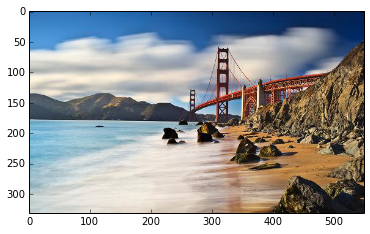

In [4]:
filenames = ['data/san_francisco.jpg']
filename_queue = tf.train.string_input_producer(filenames)

print(filename_queue)

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

images = tf.image.decode_jpeg(value, channels=3)

#print(images)

init_op = tf.initialize_all_variables()
with tf.Session() as sess:
  sess.run(init_op)
  
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(1): #length of your filename list
      image = images.eval() #here is your image Tensor :) 

  print(image.shape)

  pix = np.array(image)
  print(pix)
#  Image.show(Image.fromarray(np.asarray(image)))

plt.imshow(pix)


In [6]:
rand = tf.constant(
    [[[1, 1, 1], [2, 2, 2]],
     [[3, 3, 3], [4, 4, 4]],
     [[5, 5, 5], [6, 6, 6]]])

slice = tf.slice(rand,[1,0,0],[1,1,3])
slice2 = tf.slice(rand,[1,0,0],[1,2,3])
slice3 = tf.slice(rand,[1,0,0],[2,1,3])
slice4 = tf.slice(rand,[0,0,0],[2,2,3])

print(rand.get_shape())

sess = tf.Session()
result = sess.run(slice)
print('')
print(result)

result2 = sess.run(slice2)
print('')
print(result2)

result3 = sess.run(slice3)
print('')
print(result3)

result4 = sess.run(slice4)
print('')
print(result4)

(3, 2, 3)

[[[3 3 3]]]

[[[3 3 3]
  [4 4 4]]]

[[[3 3 3]]

 [[5 5 5]]]

[[[1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]]]
